In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df.shape

(5572, 5)

<!-- # 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy -->

# 1. Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
2999,ham,Id onluy matters when getting on from offcampus
4763,ham,Hi.:)technical support.providing assistance to...
4567,ham,hiya hows it going in sunny africa? hope u r a...
4177,ham,Two teams waiting for some players
5490,ham,K. I will sent it again


In [7]:
#renaming the col
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1150,ham,(That said can you text him one more time?)
1311,ham,U r too much close to my heart. If u go away i...
4455,ham,If you want to mapquest it or something look u...
539,ham,"I am in tirupur da, once you started from offi..."
2989,ham,"Love isn't a decision, it's a feeling. If we c..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target']=encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [14]:
df.shape

(5169, 2)

# 2.EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

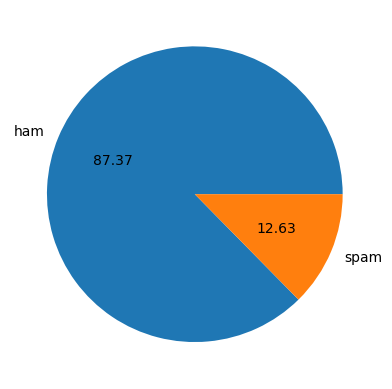

In [16]:
import matplotlib.pyplot as plt
plt.pie
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\situ_data_science\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)


In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

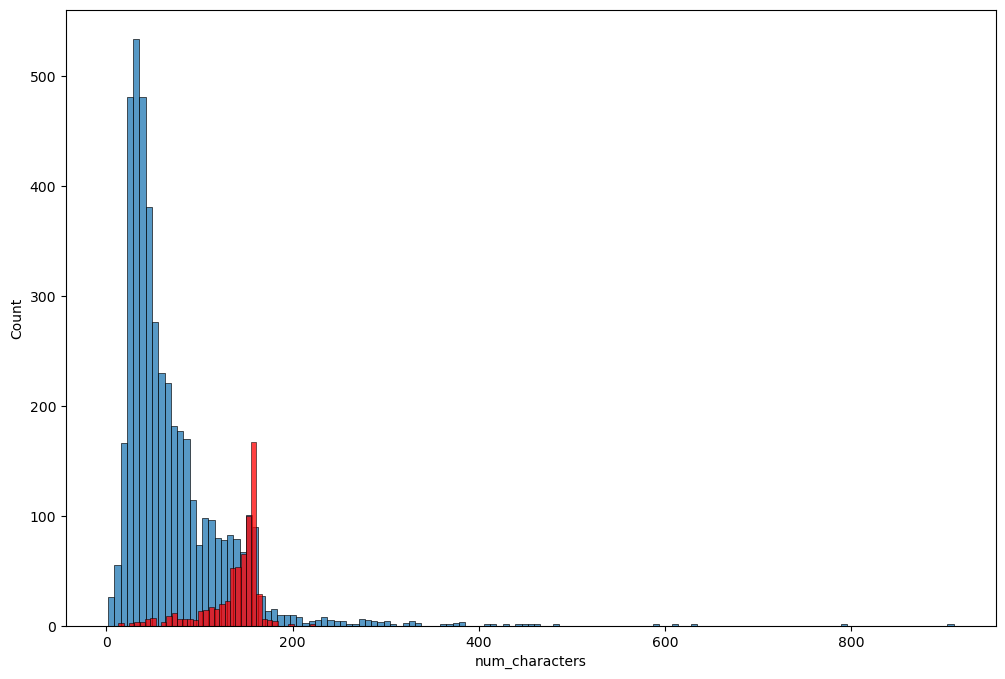

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

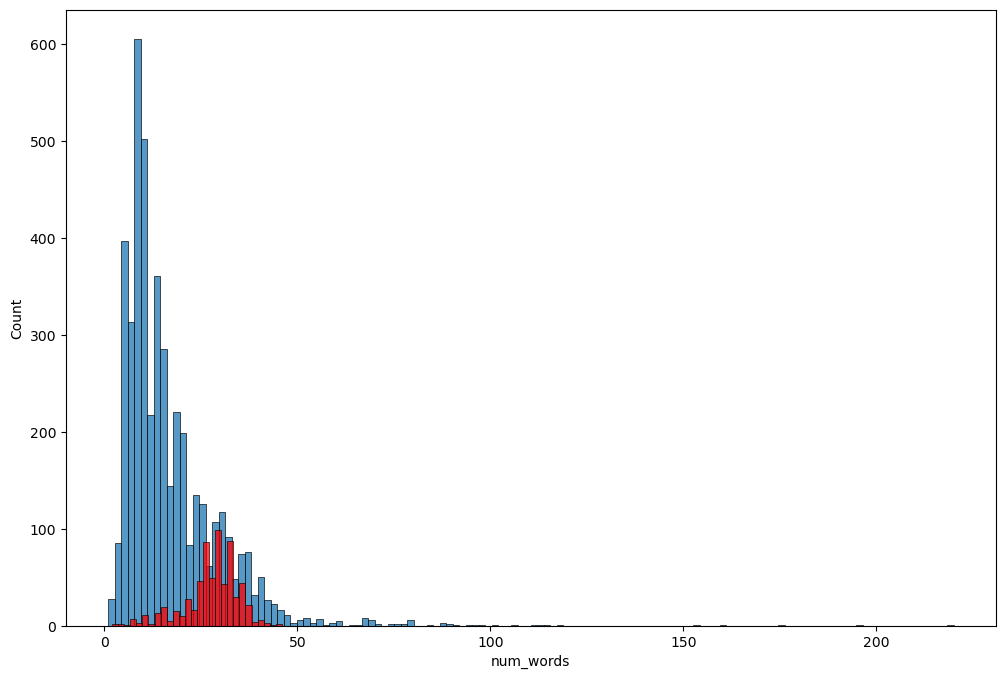

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

C:\Users\situ_data_science\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


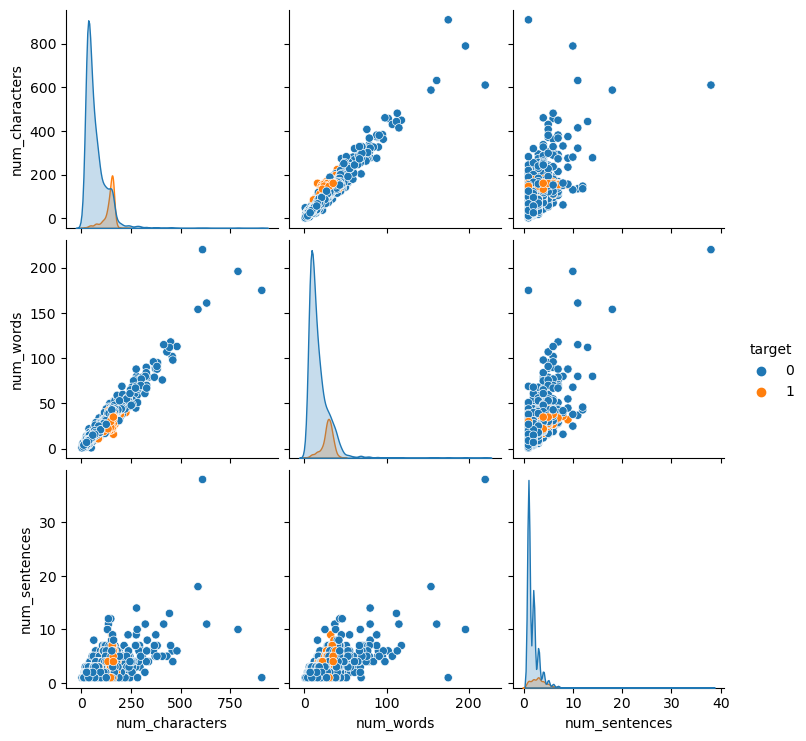

In [32]:
sns.pairplot(df,hue='target')

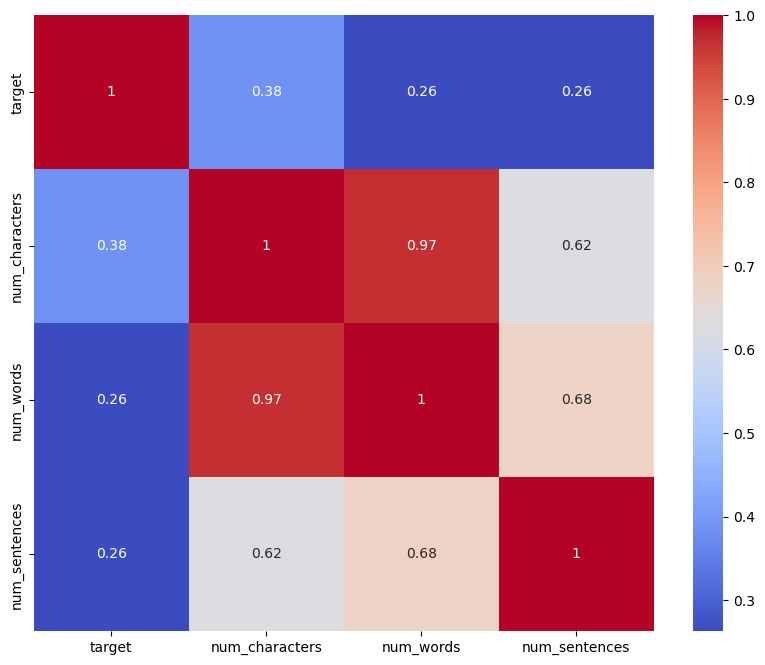

In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'int32'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# 3. Data Preprocessing


# Lower case



# Tokenization


# Removing special characters


# Removing stop words and punctuation


# Stemming

In [34]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return  " ".join(y) 

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# transform_text("Im gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
# )

In [38]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

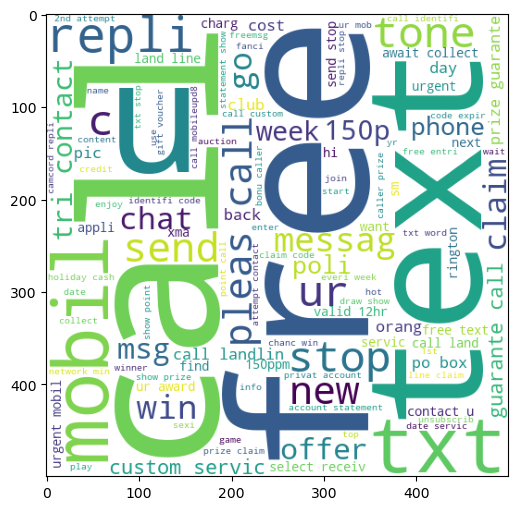

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

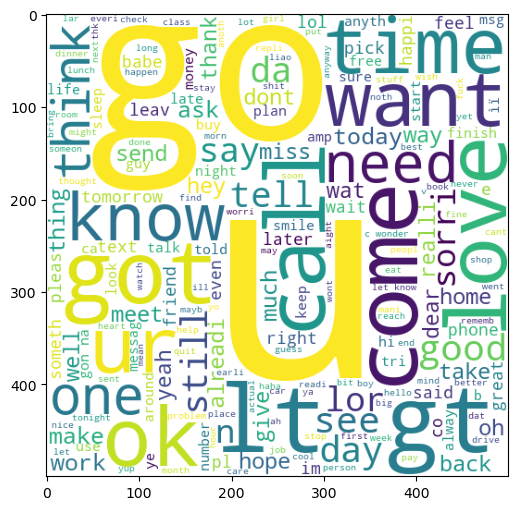

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

In [50]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]



(0        call
 1        free
 2           2
 3         txt
 4        text
 5           u
 6          ur
 7       mobil
 8        stop
 9       repli
 10      claim
 11          4
 12      prize
 13        get
 14        new
 15     servic
 16       tone
 17       send
 18     urgent
 19      nokia
 20    contact
 21      award
 22      phone
 23       cash
 24      pleas
 25       week
 26        win
 27          c
 28    collect
 29        min
 Name: 0, dtype: object,
 0     320
 1     191
 2     155
 3     141
 4     122
 5     119
 6     119
 7     114
 8     104
 9     103
 10     98
 11     97
 12     82
 13     74
 14     64
 15     64
 16     63
 17     60
 18     57
 19     57
 20     56
 21     55
 22     52
 23     51
 24     51
 25     49
 26     48
 27     45
 28     45
 29     45
 Name: 1, dtype: int64)

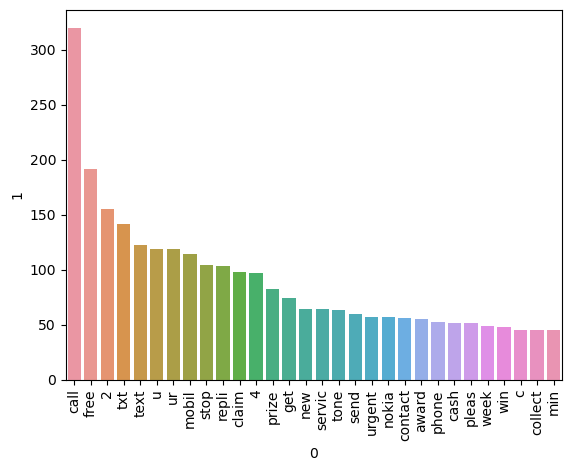

In [51]:

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)


35404

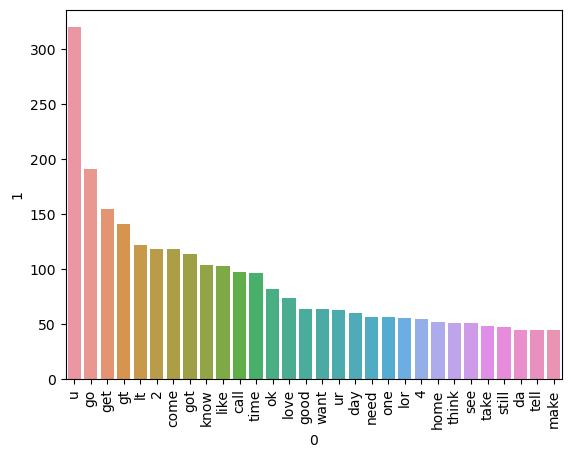

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [55]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [99]:
# Required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming df['transformed_text'] contains your preprocessed text and df['target'] contains labels

# Step 1: Convert the text data into numerical features using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()  # Fit and transform the text data
y = df['target'].values  # Target labels

# Step 2: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 3: Train the Multinomial Naive Bayes model
mnb = MultinomialNB()  # Initialize the model
mnb.fit(X_train, y_train)  # Fit the model to the training data

# Step 4: Test the model (optional, just to check performance)
y_pred = mnb.predict(X_test)  # Make predictions on the test set
print("Accuracy on test data:", accuracy_score(y_test, y_pred))

# Step 5: Predict new data
new_texts = ["Your new text here"]  # Replace with your actual new text input
X_new = tfidf.transform(new_texts).toarray()  # Transform the new text using the same vectorizer

# Predict with the model
y_pred_new = mnb.predict(X_new)  # Make predictions on the new data
print("Prediction for new text:", y_pred_new)


Accuracy on test data: 0.9709864603481625
Prediction for new text: [0]


In [97]:
# Fit the TfidfVectorizer to your training data (df['transformed_text'])
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train the Multinomial Naive Bayes model
mnb.fit(X_train, y_train)

# Now predict on new data (assuming `new_texts` contains your new text data)
new_texts = ["your new text here"]  # Replace with your actual text input
X_new = tfidf.transform(new_texts).toarray()

# Make predictions using the trained model
y_pred_new = mnb.predict(X_new)
print("Prediction for new text:", y_pred_new)


Prediction for new text: [0]


In [100]:
# Fit the MultinomialNB model
mnb.fit(X_train, y_train)

# Save the models
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))


In [101]:
import pickle

# Load vectorizer and model
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
mnb = pickle.load(open('model.pkl', 'rb'))

# Transform new text data and make predictions
new_texts = ["Your spam message goes here"]  # Example text for prediction
X_new = tfidf.transform(new_texts).toarray()

# Predict with the model
y_pred_new = mnb.predict(X_new)
print("Prediction for new text:", y_pred_new)


Prediction for new text: [0]


In [57]:
# tfidf = TfidfVectorizer(max_features=3000)
# X = tfidf.fit_transform(df['transformed_text']).toarray()  # Convert text to numerical features
# y = df['target'].values  

In [58]:
# # Step 3: Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [59]:
# y=df['target'].values

In [60]:
# y

In [61]:
# from sklearn.model_selection import train_test_split

In [62]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
# # Step 4: Initialize models
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [64]:
# gnb.fit(X_train, y_train)
# y_pred1 = gnb.predict(X_test)
# print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred1))
# print("Precision:", precision_score(y_test, y_pred1))

In [65]:

# # Step 6: Train MultinomialNB and evaluate
# mnb.fit(X_train, y_train)
# y_pred2 = mnb.predict(X_test)
# print("\nMultinomialNB Accuracy:", accuracy_score(y_test, y_pred2))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred2))
# print("Precision:", precision_score(y_test, y_pred2))

In [66]:
# Step 7: Train BernoulliNB and evaluate
# bnb.fit(X_train, y_train)
# y_pred3 = bnb.predict(X_test)
# print("\nBernoulliNB Accuracy:", accuracy_score(y_test, y_pred3))
# print("Confusion Matrix:", confusion_matrix(y_test, y_pred3))
# print("Precision:", precision_score(y_test, y_pred3))

In [67]:
# pip install xgboost


In [68]:
# # Step 8: Trying out multiple classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

In [69]:
# # Initialize classifiers
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [70]:
# #  Classifiers dictionary
# clfs = {
#     'SVC': svc,
#     'KN': knc,
#     'NB': mnb,
#     'DT': dtc,
#     'LR': lrc,
#     'RF': rfc,
#     'AdaBoost': abc,
#     'BgC': bc,
#     'ETC': etc,
#     'GBDT': gbdt,
#     'xgb': xgb
# }


In [71]:
# # Step 9: Function to train and evaluate classifiers
# def train_classifier(clf, X_train, y_train, X_test, y_test):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     return accuracy, precision

In [72]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [73]:
# # Evaluate all classifiers
# accuracy_scores = []
# precision_scores = []

# for name, clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
#     print(f"\nFor {name}:")
#     print(f"Accuracy: {current_accuracy}")
#     print(f"Precision: {current_precision}")
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [74]:
# # Step 10: Create performance dataframe
# performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
# performance_df = performance_df.sort_values('Precision', ascending=False)


In [75]:
# performance_df

In [76]:
# # Step 11: Plot performance using Seaborn
# performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
# sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
# plt.ylim(0.5, 1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [77]:
# performance_df1


In [78]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [79]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [80]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [81]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [82]:
# new_df = performance_df.merge(temp_df,on='Algorithm')


In [83]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [84]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [85]:
# new_df_scaled.merge(temp_df,on='Algorithm')


In [86]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [87]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [88]:
# voting.fit(X_train,y_train)

In [89]:

# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [90]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [91]:
# from sklearn.ensemble import StackingClassifier
# estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
# stack_clf = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
# stack_clf.fit(X_train, y_train)
# y_pred_stack = stack_clf.predict(X_test)
# print("\nStacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
# print("Precision:", precision_score(y_test, y_pred_stack))

In [92]:

# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [93]:

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [94]:
# # Step 14: Save the model and vectorizer using pickle
# pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
# pickle.dump(mnb, open('model.pkl', 'wb'))